<a href="https://colab.research.google.com/github/manurathi1/Colab_Notebooks/blob/main/Two_Moment_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import altair as alt

In [ ]:
mean = 0.02
sigma = 0.1
simNumDays = 1000

**Univariate series**


---


Given mean($\mu$) and standard deviation($\sigma$) for univeriate series simulated series *X* = $\mu$ + $\sigma$ * *N(0,1)*

In [ ]:
def getTwoMomentSimulatedSr(mean, std, simNumDays):
  normN = np.random.normal(0,1, simNumDays)
  averageReturnDuplicated = np.asarray([mean]*simNumDays)
  simSr = averageReturnDuplicated + sigma *normN
  return simSr


In [ ]:
meanDf = pd.DataFrame(columns = ['SimNumDays', 'Mean', 'Std'])
resultSr = [[],[],[]]
for i in range(10,5000,10):
  tmpSr = getTwoMomentSimulatedSr(mean, sigma, i)
  resultSr[0].append(i)
  resultSr[1].append(np.mean(tmpSr))
  resultSr[2].append(np.std(tmpSr))

meanDf['SimNumDays'] = resultSr[0]
meanDf['Mean'] = resultSr[1]
meanDf['Std'] = resultSr[2]


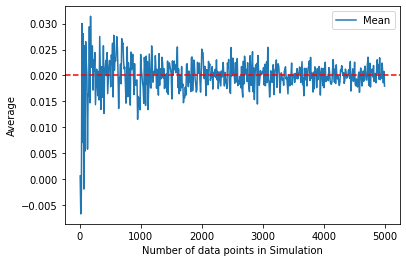

In [ ]:
ax = meanDf.plot(y = 'Mean', x = 'SimNumDays', xlabel = 'Number of data points in Simulation', ylabel = 'Average')
ax.axhline(y=0.02, color='r', linestyle='--')

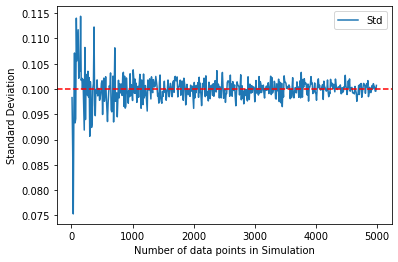

In [ ]:
axS = meanDf.plot(y = 'Std', x = 'SimNumDays', xlabel = 'Number of data points in Simulation', ylabel = 'Standard Deviation')
axS.axhline(y=0.1, color='r', linestyle='--')

**Multivariate series**


---


Given series of mean($\mu$) and covariance matrix($\Sigma$) for univeriate series simulated series *X* = $\mu$ + $\sqrt{\Sigma}$ * *N(0,1)*

In [ ]:
def getTwoMomentSimulatedDf(meanSr, covMatrix, simNumDays):

    numberOfDimesion = meanSr.size
    cholskeyDecompositionCov = np.linalg.cholesky(covMatrix)
    normalNumbers = np.random.normal(0,1,(simNumDays, numberOfDimesion))

    averageReturnDuplicated = np.asarray([meanSr.values]*simNumDays)
    scaleNormal = np.dot(cholskeyDecompositionCov, normalNumbers.T)
    simulatedNormal = averageReturnDuplicated.T + scaleNormal
    simulatedReturnDf = pd.DataFrame(simulatedNormal.T, columns= meanSr.index)
    return simulatedReturnDf

In [ ]:
meanSr = pd.Series([0.2, 0.3], index = ['A', 'B'])
covMatrix = [[1, 0.1], [0.1,1]]
simNumDays = 10000

In [ ]:
simSr = getTwoMomentSimulatedDf(meanSr, covMatrix, simNumDays)

In [ ]:
simSr['A'].mean()

0.20631503806837978

In [ ]:
simSr['B'].mean()

0.2977735160468631

In [ ]:
np.cov(simSr.T)

array([[0.99404948, 0.09591597],
       [0.09591597, 0.97524505]])